In [6]:
# importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# importing training data set's
training_data_set = pd.read_csv("Training_Data_Set - Copy.csv")

In [11]:
training_data_set.head(5)

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
0,25001,skoda,octavia,Ahmedabad,NaN,Second,1964,55,1964,147.0,compact,8,man,None,None,petrol,543764.25
1,25002,fiat,panda,Ahmedabad,27750.0,Third,2012,7,1242,51.0,NaN,6,man,4,4,petrol,401819.25
2,25003,bmw,x1,Hyderabad,46000.0,Third,2014,5,1995,105.0,NaN,7,auto,4,5,diesel,2392855.50
3,25004,nissan,juke,Mumbai,43949.0,Third,2011,8,1618,140.0,NaN,7,man,4,5,petrol,958606.50
4,25005,bmw,x5,Jaipur,59524.0,Fourth & Above,2012,7,2993,180.0,NaN,7,auto,4,5,diesel,3085561.50


In [12]:
# importing testing data set's
test_data_set = pd.read_csv("Test_Data_Set.csv")

In [13]:
test_data_set.head(5)

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type
0,11001,skoda,octavia,Mumbai,150000.0,First,2007,12,1595,75.0,NaN,5,man,4,5,petrol
1,11002,skoda,rapid,Coimbatore,29376.0,Third,2014,5,1598,77.0,NaN,4,man,4,5,diesel
2,11003,skoda,octavia,Coimbatore,30563.0,Second,2014,5,1968,110.0,NaN,5,man,5,5,diesel
3,11004,audi,q3,Delhi,8650.0,Fourth & Above,2015,4,1968,110.0,NaN,8,auto,4,5,diesel
4,11005,audi,tt,Chennai,6400.0,Third,2015,4,1984,169.0,NaN,4,auto,2,None,petrol


# Now checking whether the given training data set contain any null vallue or not. **(basically cleaning, flitering the dataset for proper outcome.)**

In [14]:
training_data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53515 entries, 0 to 53514
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   53515 non-null  int64  
 1   Maker                53515 non-null  object 
 2   model                53515 non-null  object 
 3   Location             53515 non-null  object 
 4   Distance             52304 non-null  float64
 5   Owner Type           53515 non-null  object 
 6   manufacture_year     53515 non-null  int64  
 7   Age of car           53515 non-null  int64  
 8   engine_displacement  53515 non-null  int64  
 9   engine_power         52076 non-null  float64
 10  body_type            4136 non-null   object 
 11  Vroom Audit Rating   53515 non-null  int64  
 12  transmission         53515 non-null  object 
 13  door_count           53515 non-null  object 
 14  seat_count           53515 non-null  object 
 15  fuel_type            53515 non-null 

In [15]:
test_data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5615 entries, 0 to 5614
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   5615 non-null   int64  
 1   Maker                5615 non-null   object 
 2   model                5615 non-null   object 
 3   Location             5615 non-null   object 
 4   Distance             5487 non-null   float64
 5   Owner Type           5615 non-null   object 
 6   manufacture_year     5615 non-null   int64  
 7   Age of car           5615 non-null   int64  
 8   engine_displacement  5615 non-null   int64  
 9   engine_power         5447 non-null   float64
 10  body_type            422 non-null    object 
 11  Vroom Audit Rating   5615 non-null   int64  
 12  transmission         5615 non-null   object 
 13  door_count           5615 non-null   object 
 14  seat_count           5615 non-null   object 
 15  fuel_type            5615 non-null   o

In [16]:
print('Null values for each column')
training_data_set.isnull().sum()

Null values for each column


Id                         0
Maker                      0
model                      0
Location                   0
Distance                1211
Owner Type                 0
manufacture_year           0
Age of car                 0
engine_displacement        0
engine_power            1439
body_type              49379
Vroom Audit Rating         0
transmission               0
door_count                 0
seat_count                 0
fuel_type                  0
Price                      0
dtype: int64

In [17]:
print('Null values for each column')
test_data_set.isnull().sum()

Null values for each column


Id                        0
Maker                     0
model                     0
Location                  0
Distance                128
Owner Type                0
manufacture_year          0
Age of car                0
engine_displacement       0
engine_power            168
body_type              5193
Vroom Audit Rating        0
transmission              0
door_count                0
seat_count                0
fuel_type                 0
dtype: int64

Here, we can depict from the above outcome,some of the attributes contains null type of data which can result on training problems. so we are removing or filling the data in terms of (mean, median or mode). We are removing or filtering some the basis of impact of data on outcome and the gravity of count of number of that attribute.

In [18]:
# removing ID attribute and price attribute form the "training_data_set". The reason why we are removing ID is because it doesnot contributes any kind of positive or negative affect or effect
#  to the outcome the only thing that data will consume will be time, space and processing power. and the price attribute will be y_train data series.
training_data_set.drop(columns=["Id"], inplace= True)

In [19]:
training_data_set.drop(columns=["body_type"], inplace= True, axis=1)

In [20]:
training_data_set[['engine_power','Distance ']] = training_data_set[['engine_power','Distance ']].fillna(training_data_set[['engine_power','Distance ']].mean())

In [21]:
print('Null values for each column')

training_data_set.isnull().sum()

Null values for each column


Maker                  0
model                  0
Location               0
Distance               0
Owner Type             0
manufacture_year       0
Age of car             0
engine_displacement    0
engine_power           0
Vroom Audit Rating     0
transmission           0
door_count             0
seat_count             0
fuel_type              0
Price                  0
dtype: int64

In [22]:
# now doing the same for test data
test_data_set.drop(columns=["Id"], inplace= True)

In [23]:
test_data_set.drop(columns=["body_type"], inplace= True, axis=1)

In [24]:
test_data_set[['engine_power','Distance ']] = test_data_set[['engine_power','Distance ']].fillna(test_data_set[['engine_power','Distance ']].mean())

In [25]:
print('Null values for each column')
test_data_set.isnull().sum()

Null values for each column


Maker                  0
model                  0
Location               0
Distance               0
Owner Type             0
manufacture_year       0
Age of car             0
engine_displacement    0
engine_power           0
Vroom Audit Rating     0
transmission           0
door_count             0
seat_count             0
fuel_type              0
dtype: int64

# **Explorotory data analysis(EDA)**
 It refers to :-" *the crucial process of performing initial investigations on data to discover patterns to check assumptions with the help of summary statistics and graphical representations.*"

In [26]:
training_data_set.describe()

,Distance,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,Price
count,5.351500e+04,53515.000000,53515.000000,53515.000000,53515.000000,53515.000000,5.351500e+04
mean,9.454626e+04,2010.408110,8.591890,1904.049014,100.448345,5.998374,1.098084e+06
std,2.724259e+05,4.650322,4.650322,1496.564596,44.716995,1.418336,8.441565e+05
min,0.000000e+00,1934.000000,3.000000,14.000000,10.000000,4.000000,3.000000e+00
25%,1.650700e+04,2008.000000,5.000000,1395.000000,74.000000,5.000000,5.051812e+05
50%,6.850000e+04,2011.000000,8.000000,1896.000000,95.000000,6.000000,8.854552e+05
75%,1.333040e+05,2014.000000,11.000000,1995.000000,125.000000,7.000000,1.477829e+06
max,9.899800e+06,2016.000000,85.000000,32000.000000,896.000000,8.000000,2.212078e+07


In [33]:
categorical = []
numerical = []
category_column =[]
for i in training_data_set.columns:
  if training_data_set[i].dtype == 'int64' or training_data_set[i].dtype == 'float64':
    numerical.append(i)
  else:
    # print(training_data_set[i][1])
    # if training_data_set[i] == "None":
    #   category_column.append(i)
    categorical.append(i)

In [28]:
categorical

['Maker',
 'model',
 'Location',
 'Owner Type',
 'transmission',
 'door_count',
 'seat_count',
 'fuel_type']

In [29]:
numerical

['Distance ',
 'manufacture_year',
 'Age of car',
 'engine_displacement',
 'engine_power',
 'Vroom Audit Rating',
 'Price']

In [30]:
category_column

[]

In [31]:
category_column = ['door_count','seat_count']
category_dict={'None':0,'1':1,'2':2,'3':3,'4':4,'5':5,'6':6,'7':7,'8':8,'9':9}
for col in category_column:
  training_data_set[col] = training_data_set[col].map(category_dict)

In [34]:
categorical

['Maker', 'model', 'Location', 'Owner Type', 'transmission', 'fuel_type']

In [35]:
numerical

['Distance ',
 'manufacture_year',
 'Age of car',
 'engine_displacement',
 'engine_power',
 'Vroom Audit Rating',
 'door_count',
 'seat_count',
 'Price']

# ***Now, doing same for test data set***

In [36]:
for col in category_column:
  test_data_set[col] = test_data_set[col].map(category_dict)

In [37]:
categorical

['Maker', 'model', 'Location', 'Owner Type', 'transmission', 'fuel_type']

In [38]:
numerical

['Distance ',
 'manufacture_year',
 'Age of car',
 'engine_displacement',
 'engine_power',
 'Vroom Audit Rating',
 'door_count',
 'seat_count',
 'Price']

## ***Now, we are trying to create Heat map***

Text(0.5, 1.0, 'Correlation\xa0Graph')

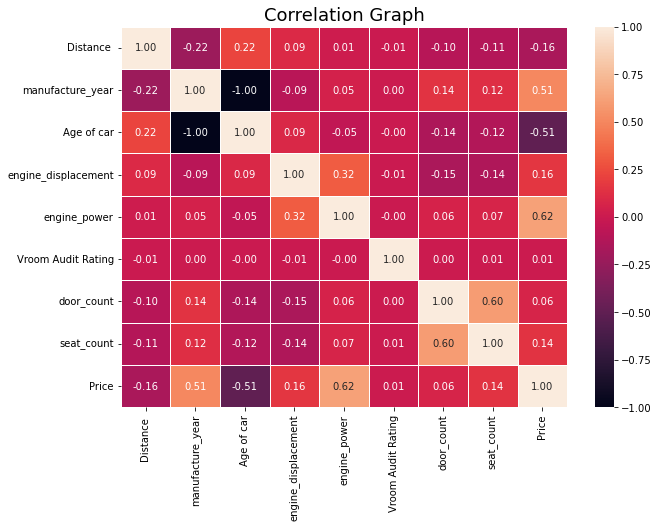

In [39]:
#Heat map
plt.figure(figsize=(10,7))
sns.heatmap(training_data_set.corr(),annot=True,linewidths=.5,fmt='.2f')
plt.title("Correlation Graph",size=18)

In [40]:
training_data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53515 entries, 0 to 53514
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Maker                53515 non-null  object 
 1   model                53515 non-null  object 
 2   Location             53515 non-null  object 
 3   Distance             53515 non-null  float64
 4   Owner Type           53515 non-null  object 
 5   manufacture_year     53515 non-null  int64  
 6   Age of car           53515 non-null  int64  
 7   engine_displacement  53515 non-null  int64  
 8   engine_power         53515 non-null  float64
 9   Vroom Audit Rating   53515 non-null  int64  
 10  transmission         53515 non-null  object 
 11  door_count           53515 non-null  int64  
 12  seat_count           53515 non-null  int64  
 13  fuel_type            53515 non-null  object 
 14  Price                53515 non-null  float64
dtypes: float64(3), int64(6), object(6)
m

In [41]:
test_data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5615 entries, 0 to 5614
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Maker                5615 non-null   object 
 1   model                5615 non-null   object 
 2   Location             5615 non-null   object 
 3   Distance             5615 non-null   float64
 4   Owner Type           5615 non-null   object 
 5   manufacture_year     5615 non-null   int64  
 6   Age of car           5615 non-null   int64  
 7   engine_displacement  5615 non-null   int64  
 8   engine_power         5615 non-null   float64
 9   Vroom Audit Rating   5615 non-null   int64  
 10  transmission         5615 non-null   object 
 11  door_count           5615 non-null   object 
 12  seat_count           5615 non-null   object 
 13  fuel_type            5615 non-null   object 
dtypes: float64(2), int64(4), object(8)
memory usage: 614.3+ KB


# **Feature Engineering**

In this section, we will cover a few common feature engineering tasks: features for representing categorical data, features for representing text, and features for representing images. Additionally, we will discuss derived features for increasing model complexity and imputation of missing data. Often this process is known as vectorization, as it involves converting arbitrary data into well-behaved vectors.

In [42]:
training_data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53515 entries, 0 to 53514
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Maker                53515 non-null  object 
 1   model                53515 non-null  object 
 2   Location             53515 non-null  object 
 3   Distance             53515 non-null  float64
 4   Owner Type           53515 non-null  object 
 5   manufacture_year     53515 non-null  int64  
 6   Age of car           53515 non-null  int64  
 7   engine_displacement  53515 non-null  int64  
 8   engine_power         53515 non-null  float64
 9   Vroom Audit Rating   53515 non-null  int64  
 10  transmission         53515 non-null  object 
 11  door_count           53515 non-null  int64  
 12  seat_count           53515 non-null  int64  
 13  fuel_type            53515 non-null  object 
 14  Price                53515 non-null  float64
dtypes: float64(3), int64(6), object(6)
m

In [43]:
# As you can observe that the Dtype of dome of the columns are not int type which will give us some problem later while creating model because those model only takes int or float type value
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
for col in categorical : 
    training_data_set[col] = label.fit_transform(training_data_set[col])

In [44]:
training_data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53515 entries, 0 to 53514
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Maker                53515 non-null  int32  
 1   model                53515 non-null  int32  
 2   Location             53515 non-null  int32  
 3   Distance             53515 non-null  float64
 4   Owner Type           53515 non-null  int32  
 5   manufacture_year     53515 non-null  int64  
 6   Age of car           53515 non-null  int64  
 7   engine_displacement  53515 non-null  int64  
 8   engine_power         53515 non-null  float64
 9   Vroom Audit Rating   53515 non-null  int64  
 10  transmission         53515 non-null  int32  
 11  door_count           53515 non-null  int64  
 12  seat_count           53515 non-null  int64  
 13  fuel_type            53515 non-null  int32  
 14  Price                53515 non-null  float64
dtypes: float64(3), int32(6), int64(6)
me

doing same for test

In [45]:
test_data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5615 entries, 0 to 5614
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Maker                5615 non-null   object 
 1   model                5615 non-null   object 
 2   Location             5615 non-null   object 
 3   Distance             5615 non-null   float64
 4   Owner Type           5615 non-null   object 
 5   manufacture_year     5615 non-null   int64  
 6   Age of car           5615 non-null   int64  
 7   engine_displacement  5615 non-null   int64  
 8   engine_power         5615 non-null   float64
 9   Vroom Audit Rating   5615 non-null   int64  
 10  transmission         5615 non-null   object 
 11  door_count           5615 non-null   object 
 12  seat_count           5615 non-null   object 
 13  fuel_type            5615 non-null   object 
dtypes: float64(2), int64(4), object(8)
memory usage: 614.3+ KB


In [46]:
from sklearn.preprocessing import LabelEncoder
labe2=LabelEncoder()
categorical.append("door_count")
categorical.append("seat_count")
for col in categorical : 
    test_data_set[col] = labe2.fit_transform(test_data_set[col])

In [47]:
test_data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5615 entries, 0 to 5614
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Maker                5615 non-null   int32  
 1   model                5615 non-null   int32  
 2   Location             5615 non-null   int32  
 3   Distance             5615 non-null   float64
 4   Owner Type           5615 non-null   int32  
 5   manufacture_year     5615 non-null   int64  
 6   Age of car           5615 non-null   int64  
 7   engine_displacement  5615 non-null   int64  
 8   engine_power         5615 non-null   float64
 9   Vroom Audit Rating   5615 non-null   int64  
 10  transmission         5615 non-null   int32  
 11  door_count           5615 non-null   int32  
 12  seat_count           5615 non-null   int32  
 13  fuel_type            5615 non-null   int32  
dtypes: float64(2), int32(8), int64(4)
memory usage: 438.8 KB


In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X = training_data_set.drop('Price', axis=1)
y = training_data_set['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

print('Number of training data:', X_train.shape[0])
print('Number of testing data:', X_test.shape[0])

Number of training data: 52979
Number of testing data: 536


In [57]:
X_train.head()

,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type
1590,1,18,6,150000.0,2,2011,8,1995,105.0,4,1,5,5,0
842,6,8,6,175120.0,0,2009,10,1896,77.0,6,1,5,5,0
33283,1,19,7,87889.0,3,2012,7,1995,135.0,6,0,4,5,0
31650,0,4,9,24618.0,2,2015,4,1984,169.0,6,1,2,4,1
34979,5,13,0,138000.0,1,2007,12,1997,104.0,6,1,5,5,1


In [64]:
!pip install xgboost

In [66]:
!pip install lightgbm

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
import lightgbm as lgb
import joblib

lr_model =LinearRegression()
rfr_model =RandomForestRegressor(n_estimators=100)
gbr_model =GradientBoostingRegressor()
dtr_model =DecisionTreeRegressor()
r_model =AdaBoostRegressor()
xgb_model = XGBRegressor()
lgb_reg = lgb.LGBMRegressor(objective='regression',
                            learning_rate=0.2,
                            n_estimators=500,
                            max_depth=5,
                            subsample=0.5,
                            colsample_bytree=0.5)
# svm_model=SVC(kernel='linear',C=1)
# svm_model.fit(X_train,y_train)

In [76]:
from sklearn.metrics import r2_score
regression_models = [lr_model,rfr_model,gbr_model,dtr_model,r_model,xgb_model,lgb_reg]
score_train=[]
score_test=[]

for model in regression_models : 
    model.fit(X_train,y_train)
    score_train.append(model.score(X_train,y_train))
    score_test.append(model.score(X_test,y_test))
    
    filename = type(model).__name__ + '.pkl'
    joblib.dump(model, filename)

In [77]:
model_names = ['Linear Regression','Random Forest Regressor','Gradient Boosting Regressor','Decision Tree Regressor','AdaBoostRegressor',"XGBRegressor","lgb"]

scores = pd.DataFrame([model_names,score_train,score_test])
scores

,0,1,2,3,4,5,6
0,Linear Regression,Random Forest Regressor,Gradient Boosting Regressor,Decision Tree Regressor,AdaBoostRegressor,XGBRegressor,lgb
1,0.696087,0.989316,0.916868,0.999919,0.244578,0.965114,0.947388
2,0.736771,0.949726,0.945565,0.918926,0.282208,0.954083,0.955822


In [78]:
scores = scores.transpose()
scores.columns = [ 'Model','Training Set Accuracy','Testing set Accuracy']
scores

,Model,Training Set Accuracy,Testing set Accuracy
0,Linear Regression,0.696087,0.736771
1,Random Forest Regressor,0.989316,0.949726
2,Gradient Boosting Regressor,0.916868,0.945565
3,Decision Tree Regressor,0.999919,0.918926
4,AdaBoostRegressor,0.244578,0.282208
5,XGBRegressor,0.965114,0.954083
6,lgb,0.947388,0.955822


In [79]:
model = joblib.load('XGBRegressor.pkl')
# Make predictions on the test data
predictions = model.predict(test_data_set)

In [81]:
testing_df=pd.read_csv('Test_Data_Set.csv')
testing_df.head()

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type
0,11001,skoda,octavia,Mumbai,150000.0,First,2007,12,1595,75.0,NaN,5,man,4,5,petrol
1,11002,skoda,rapid,Coimbatore,29376.0,Third,2014,5,1598,77.0,NaN,4,man,4,5,diesel
2,11003,skoda,octavia,Coimbatore,30563.0,Second,2014,5,1968,110.0,NaN,5,man,5,5,diesel
3,11004,audi,q3,Delhi,8650.0,Fourth & Above,2015,4,1968,110.0,NaN,8,auto,4,5,diesel
4,11005,audi,tt,Chennai,6400.0,Third,2015,4,1984,169.0,NaN,4,auto,2,None,petrol


In [82]:
output_results = pd.DataFrame({'Id': testing_df['Id'], 'Price': predictions})

In [83]:
output_results.to_csv('Anish_roshan_prashamsa_car_price_prediction_XGBRegressor95_9475.csv',index=False)